In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from plotly import express as px
from plotly import graph_objects as go
import dash
from dash import dcc
from dash import html
import string

In [2]:
start_time = datetime.datetime.now()

data = pd.read_excel('/Users/tinashem/Github Repos/CareerPalz/files/LCA_Disclosure_Data_FY2023_Q4_copy.xlsx')

end_time = datetime.datetime.now()

print('Duration: {}'.format(end_time - start_time))

Duration: 0:02:55.790994


In [3]:
data.head()

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,APPENDIX_A_ATTACHED,PUBLIC_DISCLOSURE,PREPARER_LAST_NAME,PREPARER_FIRST_NAME,PREPARER_MIDDLE_INITIAL,PREPARER_BUSINESS_NAME,PREPARER_EMAIL
0,I-200-23244-317261,Certified - Withdrawn,2023-09-01,2023-09-30,2023-09-11,H-1B,"Analyst, Business Sr",15-2031.00,Operations Research Analysts,Y,...,No,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
1,I-202-23242-306442,Certified - Withdrawn,2023-08-30,2023-09-30,2023-09-07,H-1B1 Singapore,Board Certified Behavior Analyst,19-3034.00,School Psychologists,Y,...,NaN,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
2,I-200-23242-308144,Certified - Withdrawn,2023-08-30,2023-09-30,2023-09-07,H-1B,Manager - Software Engineering,15-1252.00,Software Developers,Y,...,No,Yes,"$60,000 or higher annual wage",NaN,Disclose Business,Sheppard,Kaitlyn (11606.425.22),NaN,Berry Appleman & Leiden LLP,ksheppard@bal.com
3,I-200-23172-131625,Certified - Withdrawn,2023-06-21,2023-09-30,2023-06-28,H-1B,SOFTWARE DEVELOPER,15-1252.00,Software Developers,Y,...,No,Yes,"$60,000 or higher annual wage",NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
4,I-200-23170-125146,Certified - Withdrawn,2023-06-19,2023-09-30,2023-06-26,H-1B,SOFTWARE DEVELOPER,15-1252.00,Software Developers,Y,...,No,Yes,"$60,000 or higher annual wage",NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127939 entries, 0 to 127938
Data columns (total 96 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   CASE_NUMBER                     127939 non-null  object        
 1   CASE_STATUS                     127939 non-null  object        
 2   RECEIVED_DATE                   127939 non-null  datetime64[ns]
 3   DECISION_DATE                   127939 non-null  datetime64[ns]
 4   ORIGINAL_CERT_DATE              9382 non-null    datetime64[ns]
 5   VISA_CLASS                      127939 non-null  object        
 6   JOB_TITLE                       127939 non-null  object        
 7   SOC_CODE                        127939 non-null  object        
 8   SOC_TITLE                       127939 non-null  object        
 9   FULL_TIME_POSITION              127939 non-null  object        
 10  BEGIN_DATE                      127939 non-null  datetim

In [5]:
data['JOB_TITLE'] = [string.capwords(x, sep=None) for x in data['JOB_TITLE']]

In [6]:
data['NEW_EMPLOYMENT'].nunique()

30

In [7]:
data['NEW_EMPLOYMENT'].unique()

array([   0,    1,    3,    5,    2,   50,   75,   12,   25,   20,    4,
         30,   10,   22,    8,    6,   13,   15,    7,  300,  100,   37,
          9,   14,  223, 1098,   11,   40,   60,   80])

In [8]:
data['NEW_EMPLOYMENT'].value_counts()

NEW_EMPLOYMENT
0       85137
1       39919
5         962
2         555
10        409
6         354
4         235
3          99
20         82
100        55
25         26
15         19
50         18
12         17
75         14
7          11
30          8
8           4
300         4
13          1
22          1
37          1
9           1
14          1
223         1
1098        1
11          1
40          1
60          1
80          1
Name: count, dtype: int64

In [9]:
# let's create a separate data frame for entries that have new employment and are full-time positions
new_employment = data[(data['NEW_EMPLOYMENT'] != 0) & (data['FULL_TIME_POSITION'] == 'Y')]
new_employment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42048 entries, 3 to 127933
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CASE_NUMBER                     42048 non-null  object        
 1   CASE_STATUS                     42048 non-null  object        
 2   RECEIVED_DATE                   42048 non-null  datetime64[ns]
 3   DECISION_DATE                   42048 non-null  datetime64[ns]
 4   ORIGINAL_CERT_DATE              3405 non-null   datetime64[ns]
 5   VISA_CLASS                      42048 non-null  object        
 6   JOB_TITLE                       42048 non-null  object        
 7   SOC_CODE                        42048 non-null  object        
 8   SOC_TITLE                       42048 non-null  object        
 9   FULL_TIME_POSITION              42048 non-null  object        
 10  BEGIN_DATE                      42048 non-null  datetime64[ns]
 11  END_DA

In [10]:
# let's find out the number of unique employers who have new employment
new_employment['EMPLOYER_NAME'].nunique()

12701

In [11]:
new_employment['EMPLOYER_NAME'].unique()

array(['Edvenswa Tech Inc', ' Mateu Architecture, Inc.',
       'Propel Infotech Inc', ...,
       'Pratt Rehabilitation Medicine Associates, Inc. (TMCPO)',
       'Virtualan Software, LLC', 'Virginia Electric and Power Company'],
      dtype=object)

In [12]:
# let's investigate how many new employers had certified LCA's
new_employment['CASE_STATUS'].unique()

array(['Certified - Withdrawn', 'Withdrawn', 'Denied', 'Certified'],
      dtype=object)

In [13]:
# let's investigate how many new employers had certified LCA's
certified = new_employment[new_employment['CASE_STATUS'] == 'Certified']
certified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37657 entries, 185 to 127927
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CASE_NUMBER                     37657 non-null  object        
 1   CASE_STATUS                     37657 non-null  object        
 2   RECEIVED_DATE                   37657 non-null  datetime64[ns]
 3   DECISION_DATE                   37657 non-null  datetime64[ns]
 4   ORIGINAL_CERT_DATE              0 non-null      datetime64[ns]
 5   VISA_CLASS                      37657 non-null  object        
 6   JOB_TITLE                       37657 non-null  object        
 7   SOC_CODE                        37657 non-null  object        
 8   SOC_TITLE                       37657 non-null  object        
 9   FULL_TIME_POSITION              37657 non-null  object        
 10  BEGIN_DATE                      37657 non-null  datetime64[ns]
 11  END_

In [14]:
certified.head()

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,APPENDIX_A_ATTACHED,PUBLIC_DISCLOSURE,PREPARER_LAST_NAME,PREPARER_FIRST_NAME,PREPARER_MIDDLE_INITIAL,PREPARER_BUSINESS_NAME,PREPARER_EMAIL
185,I-200-23267-376299,Certified,2023-09-24,2023-09-29,NaT,H-1B,Postdoctoral Research Fellos,19-1042.00,"Medical Scientists, Except Epidemiologists",Y,...,No,Yes,"Both $60,000 or higher in annual wage and Mast...",NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
189,I-200-23267-376413,Certified,2023-09-24,2023-09-29,NaT,H-1B,Associate Director Jc40 - Management Analysts,13-1111.00,Management Analysts,Y,...,No,Yes,"$60,000 or higher annual wage",NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
194,I-200-23267-376365,Certified,2023-09-24,2023-09-29,NaT,H-1B,Sr. Software Engineer,15-1252.00,Software Developers,Y,...,No,Yes,"$60,000 or higher annual wage",NaN,Disclose Business,Kennedy,Adaikala Mary,NaN,"Law Offices of Mary Kennedy, LLC",legal@mkimmigrationlaw.com
196,I-200-23267-376282,Certified,2023-09-24,2023-09-29,NaT,H-1B,Devops Engineer,15-1251.00,Computer Programmers,Y,...,No,Yes,"$60,000 or higher annual wage",NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
199,I-200-23268-376550,Certified,2023-09-24,2023-09-29,NaT,H-1B,Computer Programmer,15-1251.00,Computer Programmers,Y,...,No,Yes,"$60,000 or higher annual wage",NaN,Disclose Business,Alic,Emina,NaN,"Fakhoury Global Immigration, USA PC",aishwaryat@employmentimmigration.com


In [15]:
# display a maximum of 20 rows
pd.set_option("display.max_rows", 20)

In [16]:
# let's look at how many different job titles were given certified LCA's
certified['JOB_TITLE'].value_counts()

JOB_TITLE
Software Engineer                                               2153
Software Developer                                              1914
Assistant Professor                                              653
Senior Associate Jc60 -computer Systems Engineers/architects     364
Data Scientist                                                   326
                                                                ... 
Solutions Engineer - Ae                                            1
Lead Salesforce Developer                                          1
User Experience Developer - Proddev                                1
Manager - Analytics Technology                                     1
Senior Consultant 1                                                1
Name: count, Length: 11579, dtype: int64

In [17]:
# Were they all H-1B visas?
certified['VISA_CLASS'].value_counts()

VISA_CLASS
H-1B               36495
E-3 Australian       794
H-1B1 Chile          248
H-1B1 Singapore      120
Name: count, dtype: int64

In [18]:
certified_h1b = certified[certified['VISA_CLASS'] == 'H-1B']
certified_h1b.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36495 entries, 185 to 127927
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CASE_NUMBER                     36495 non-null  object        
 1   CASE_STATUS                     36495 non-null  object        
 2   RECEIVED_DATE                   36495 non-null  datetime64[ns]
 3   DECISION_DATE                   36495 non-null  datetime64[ns]
 4   ORIGINAL_CERT_DATE              0 non-null      datetime64[ns]
 5   VISA_CLASS                      36495 non-null  object        
 6   JOB_TITLE                       36495 non-null  object        
 7   SOC_CODE                        36495 non-null  object        
 8   SOC_TITLE                       36495 non-null  object        
 9   FULL_TIME_POSITION              36495 non-null  object        
 10  BEGIN_DATE                      36495 non-null  datetime64[ns]
 11  END_

In [19]:
certified_h1b['JOB_TITLE'].value_counts()

JOB_TITLE
Software Engineer                                               2139
Software Developer                                              1902
Assistant Professor                                              650
Senior Associate Jc60 -computer Systems Engineers/architects     364
Data Scientist                                                   325
                                                                ... 
Plant Floor Systems Engineer                                       1
Senior Procurement Specialist                                      1
Software Engineer Ba4                                              1
Process Development Engineer Iii                                   1
Senior Consultant 1                                                1
Name: count, Length: 10994, dtype: int64

In [20]:
# ['business analyst', 'data analyst', 'data engineer', 'data scientist', 'data']
# let's filter out the job titles that are relevant to data science
data_jobs = certified_h1b[certified_h1b['JOB_TITLE'].str.contains('data', case=False)]
data_jobs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2012 entries, 343 to 127746
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CASE_NUMBER                     2012 non-null   object        
 1   CASE_STATUS                     2012 non-null   object        
 2   RECEIVED_DATE                   2012 non-null   datetime64[ns]
 3   DECISION_DATE                   2012 non-null   datetime64[ns]
 4   ORIGINAL_CERT_DATE              0 non-null      datetime64[ns]
 5   VISA_CLASS                      2012 non-null   object        
 6   JOB_TITLE                       2012 non-null   object        
 7   SOC_CODE                        2012 non-null   object        
 8   SOC_TITLE                       2012 non-null   object        
 9   FULL_TIME_POSITION              2012 non-null   object        
 10  BEGIN_DATE                      2012 non-null   datetime64[ns]
 11  END_D

In [21]:
data_jobs['JOB_TITLE'].value_counts()

JOB_TITLE
Data Scientist                          325
Data Engineer                           241
Data Analyst                            155
Database Administrator                   68
Senior Data Analyst                      47
                                       ... 
Principle Data Engineer                   1
Pricing Data Analyst                      1
Data Scientist (00050835)                 1
Health Research Data Analyst              1
Director, Data Analytics Engineering      1
Name: count, Length: 633, dtype: int64

In [22]:
# let's filter out the job titles that are relevant to statistics
# case=False ignores the case of the letters
stat_jobs = certified_h1b[certified_h1b['JOB_TITLE'].str.contains('statistic', case=False)]
stat_jobs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112 entries, 1264 to 127614
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CASE_NUMBER                     112 non-null    object        
 1   CASE_STATUS                     112 non-null    object        
 2   RECEIVED_DATE                   112 non-null    datetime64[ns]
 3   DECISION_DATE                   112 non-null    datetime64[ns]
 4   ORIGINAL_CERT_DATE              0 non-null      datetime64[ns]
 5   VISA_CLASS                      112 non-null    object        
 6   JOB_TITLE                       112 non-null    object        
 7   SOC_CODE                        112 non-null    object        
 8   SOC_TITLE                       112 non-null    object        
 9   FULL_TIME_POSITION              112 non-null    object        
 10  BEGIN_DATE                      112 non-null    datetime64[ns]
 11  END_D

In [23]:
stat_jobs['JOB_TITLE'].value_counts()

JOB_TITLE
Biostatistician                                            12
Principal Biostatistician                                   7
Statistician                                                6
Statistical Analyst                                         4
Biostatistician Ii                                          4
                                                           ..
Analyst, Statistical Programming Ii                         1
Statistic Data Analysis Assistant                           1
Assistant Professor Of Statistics & Data Science            1
Assistant Professor Of Applied Mathematics & Statistics     1
Biostatistician/data Science Analyst                        1
Name: count, Length: 64, dtype: int64

In [24]:
stat_jobs['EMPLOYER_NAME'].value_counts()

EMPLOYER_NAME
Vertex Pharmaceuticals Incorporated                                 4
Regeneron Pharmaceuticals, Inc.                                     4
Gilead Sciences, Inc.                                               3
Eli Lilly and Company                                               3
Merck Sharp & Dohme LLC                                             2
                                                                   ..
Nokia of America Corporation                                        1
The Emmes Company, LLC                                              1
THE UNIVERSITY OF TEXAS M.D. ANDERSON CANCER CENTER                 1
The Charlotte Mecklenburg Hospital Authority d/b/a Atrium Health    1
Cleveland Clinic Foundation                                         1
Name: count, Length: 89, dtype: int64

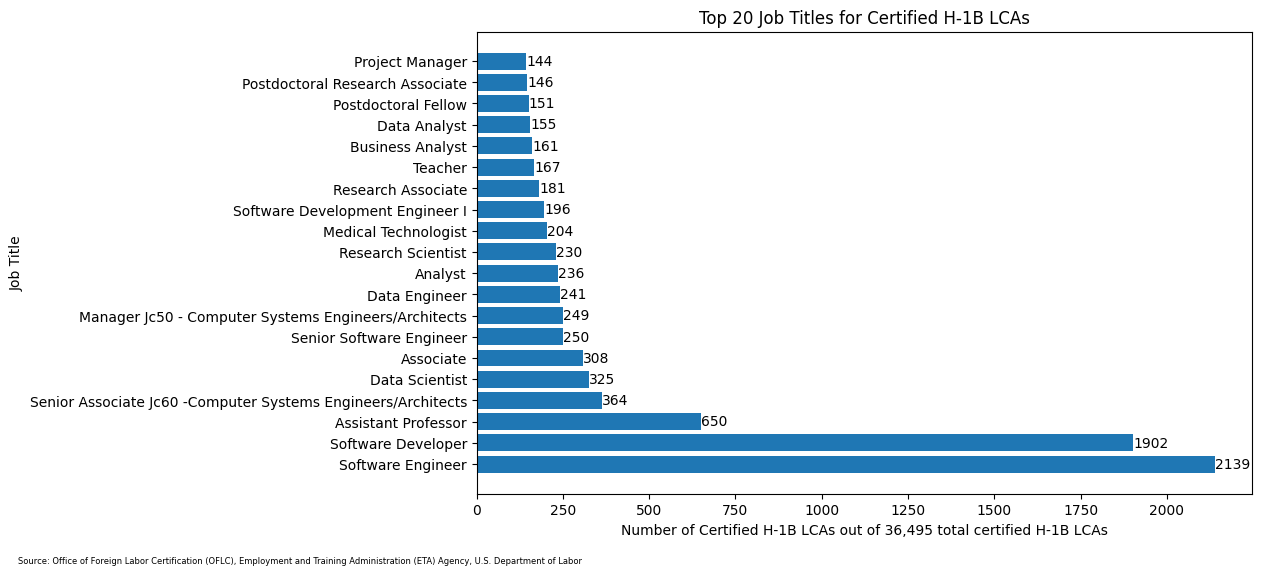

In [71]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(certified_h1b['JOB_TITLE'].value_counts()[0:20].index, certified_h1b['JOB_TITLE'].value_counts()[0:20].values);
ax.bar_label(ax.containers[0]);
ax.title.set_text('Top 20 Job Titles for Certified H-1B LCAs');
ax.set_ylabel('Job Title');
ax.set_xlabel(f'Number of Certified H-1B LCAs out of {certified_h1b['CASE_NUMBER'].nunique():,} total certified H-1B LCAs');
ax.annotate(text='Source: Office of Foreign Labor Certification (OFLC), Employment and Training Administration (ETA) Agency, U.S. Department of Labor', xy=(0,0), xytext=(-330,-50), fontsize=6, 
             xycoords='axes fraction', textcoords='offset points');

In [26]:
certified_h1b['PREVAILING_WAGE'].info()

<class 'pandas.core.series.Series'>
Index: 36495 entries, 185 to 127927
Series name: PREVAILING_WAGE
Non-Null Count  Dtype  
--------------  -----  
36495 non-null  float64
dtypes: float64(1)
memory usage: 570.2 KB


In [27]:
# let's see what the prevailing wage was for all of the entries whose unit of pay was the 'Year'
certified_h1b_year = certified_h1b[certified_h1b['PW_UNIT_OF_PAY'] == 'Year']
certified_h1b_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34415 entries, 185 to 127927
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CASE_NUMBER                     34415 non-null  object        
 1   CASE_STATUS                     34415 non-null  object        
 2   RECEIVED_DATE                   34415 non-null  datetime64[ns]
 3   DECISION_DATE                   34415 non-null  datetime64[ns]
 4   ORIGINAL_CERT_DATE              0 non-null      datetime64[ns]
 5   VISA_CLASS                      34415 non-null  object        
 6   JOB_TITLE                       34415 non-null  object        
 7   SOC_CODE                        34415 non-null  object        
 8   SOC_TITLE                       34415 non-null  object        
 9   FULL_TIME_POSITION              34415 non-null  object        
 10  BEGIN_DATE                      34415 non-null  datetime64[ns]
 11  END_

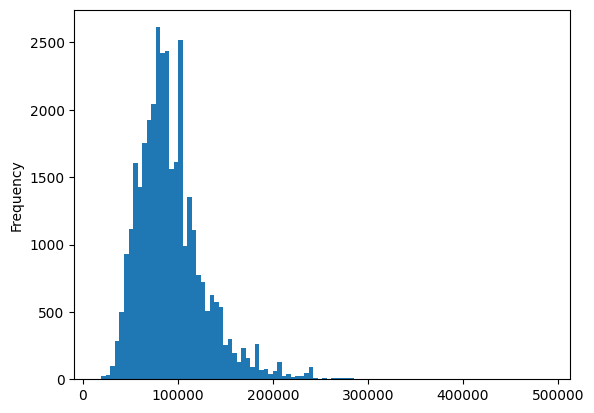

In [28]:
# let's see what the different PREVAILING_WAGE values are for the certified_h1b_year data frame
certified_h1b_year['PREVAILING_WAGE'].plot(kind='hist', bins=100);

In [29]:
# using the NAICS code, let's find out which employers were colleges and universities
colleges_and_universities = certified_h1b_year[certified_h1b_year['NAICS_CODE'] == 611310]
colleges_and_universities.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, 203 to 127920
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CASE_NUMBER                     3387 non-null   object        
 1   CASE_STATUS                     3387 non-null   object        
 2   RECEIVED_DATE                   3387 non-null   datetime64[ns]
 3   DECISION_DATE                   3387 non-null   datetime64[ns]
 4   ORIGINAL_CERT_DATE              0 non-null      datetime64[ns]
 5   VISA_CLASS                      3387 non-null   object        
 6   JOB_TITLE                       3387 non-null   object        
 7   SOC_CODE                        3387 non-null   object        
 8   SOC_TITLE                       3387 non-null   object        
 9   FULL_TIME_POSITION              3387 non-null   object        
 10  BEGIN_DATE                      3387 non-null   datetime64[ns]
 11  END_D

In [30]:
certified_h1b_year[certified_h1b_year['NAICS_CODE'] == 611310]['EMPLOYER_NAME'].unique()

array(['University of Kentucky',
       'Administrators of the Tulane Educational Fund',
       'University of Georgia; OGE', 'Lamar University',
       'Harvard University', 'Cleveland State University',
       'Cornell University', 'Louisiana State University and A&M College',
       'Bard College', 'University of Pittsburgh',
       'The University of Virginia',
       'TRUSTEES OF THE UNIVERSITY OF PENNSYLVANIA',
       'Temple University--A Commonwealth University',
       'University of Texas at Arlington',
       'The University of Texas Health Science Center at Houston',
       'WICHITA STATE UNIVERSITY', 'ALBANY MEDICAL COLLEGE',
       'SOUTHERN METHODIST UNIVERSITY',
       'The Trustees of Princeton University', 'Yale University',
       'University of Minnesota', 'Gettysburg College',
       'New York University', 'East Carolina University',
       'University of Massachusetts Boston',
       'University of California, Berkeley', 'Oregon State University',
       'The Univ

In [31]:
dir(colleges_and_universities['EMPLOYER_NAME'].unique())

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__buffer__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '

In [32]:
colleges_and_universities['EMPLOYER_NAME'].unique().__len__()

599

In [33]:
colleges_and_universities['EMPLOYER_NAME'].unique().size

599

In [34]:
colleges_and_universities['JOB_TITLE'].value_counts()

JOB_TITLE
Assistant Professor                                 618
Research Associate                                  124
Postdoctoral Fellow                                 119
Postdoctoral Research Associate                     110
Postdoctoral Scholar                                 93
                                                   ... 
Research Associate Iii (physics & Astronomy)          1
Program Manager                                       1
Associate Professor Of Hebrew Bible And Theology      1
Post-doctoral Associate, Agriculture                  1
Health Care Counselor                                 1
Name: count, Length: 1104, dtype: int64

In [35]:
colleges_and_universities['EMPLOYER_NAME'].value_counts()

EMPLOYER_NAME
The Leland Stanford, Jr University            74
University of Michigan                        73
TRUSTEES OF THE UNIVERSITY OF PENNSYLVANIA    53
Columbia University                           46
University of California, Los Angeles         45
                                              ..
Loyola Marymount University                    1
Colby-Sawyer College                           1
UNIVERSITY OF NORTH FLORIDA                    1
Carolina University                            1
URSINUS COLLEGE                                1
Name: count, Length: 599, dtype: int64

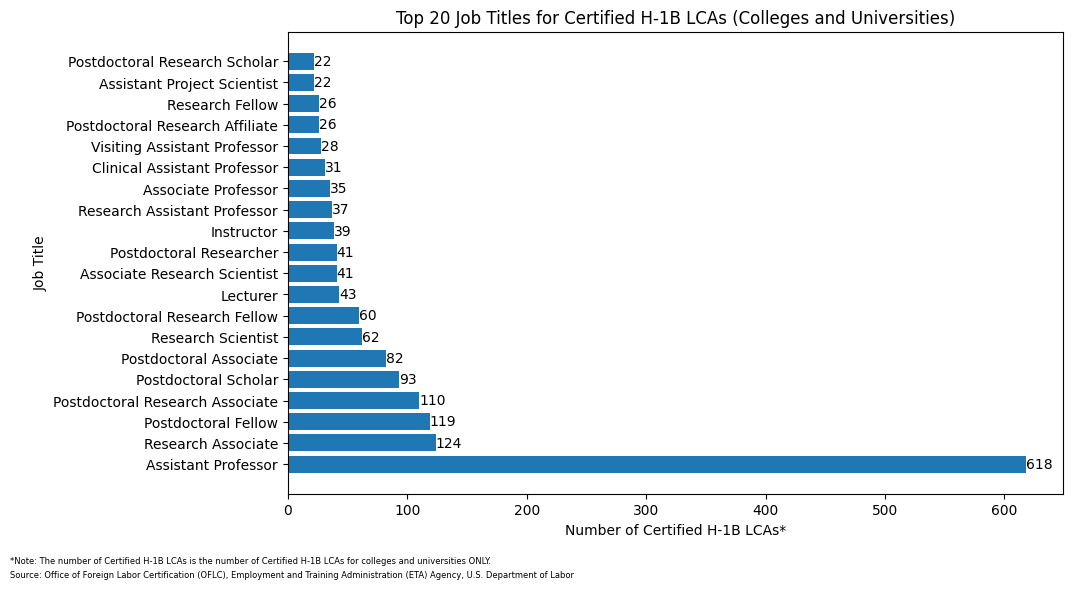

In [85]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(colleges_and_universities['JOB_TITLE'].value_counts()[0:20].index, colleges_and_universities['JOB_TITLE'].value_counts()[0:20].values);
ax.bar_label(ax.containers[0]);
ax.title.set_text('Top 20 Job Titles for Certified H-1B LCAs (Colleges and Universities)');
ax.set_ylabel('Job Title');
ax.set_xlabel(f'Number of Certified H-1B LCAs*');
ax.annotate(text=f'*Note: The number of Certified H-1B LCAs is the number of Certified H-1B LCAs for colleges and universities ONLY.', xy=(0,0), xytext=(-200,-50), fontsize=6, 
             xycoords='axes fraction', textcoords='offset points');
ax.annotate(text='Source: Office of Foreign Labor Certification (OFLC), Employment and Training Administration (ETA) Agency, U.S. Department of Labor', xy=(0,0), xytext=(-200,-60), fontsize=6, 
             xycoords='axes fraction', textcoords='offset points');

In [37]:
# let's see what the different job titles were for each given employer in the colleges_and_universities data frame
colleges_and_universities.groupby('EMPLOYER_NAME')['JOB_TITLE'].value_counts().sort_values(ascending=False)

EMPLOYER_NAME                                         JOB_TITLE                      
University of Michigan                                Postdoctoral Research Fellow       32
The Leland Stanford, Jr University                    Postdoctoral Research Affiliate    26
The Trustees of Princeton University                  Postdoctoral Research Associate    22
University of California, Los Angeles                 Postdoctoral Scholar               21
TRUSTEES OF THE UNIVERSITY OF PENNSYLVANIA            Postdoctoral Researcher            19
                                                                                         ..
Rensselaer Polytechnic Institute                      Lecturer                            1
                                                      Research Associate                  1
Regents of the University of California at Riverside  Postdoctoral Scholar                1
                                                      Postdoctoral Scholar - Employee 

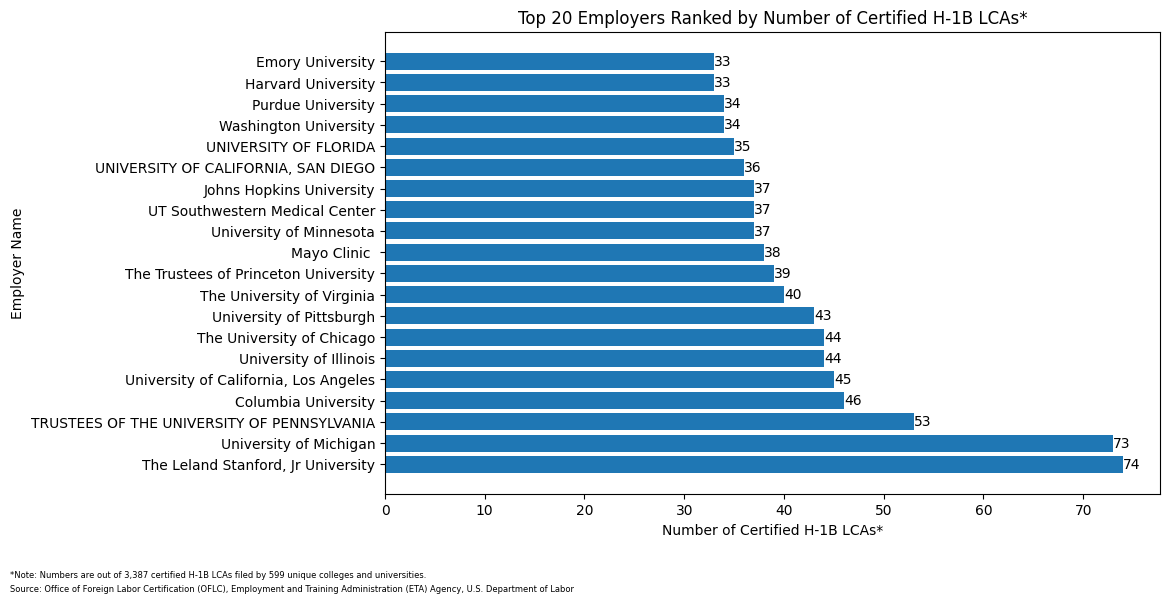

In [92]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(colleges_and_universities['EMPLOYER_NAME'].value_counts()[0:20].index, colleges_and_universities['EMPLOYER_NAME'].value_counts()[0:20].values);
ax.bar_label(ax.containers[0]);
ax.title.set_text('Top 20 Employers Ranked by Number of Certified H-1B LCAs*');
ax.set_ylabel('Employer Name');
ax.set_xlabel(f'Number of Certified H-1B LCAs*');
ax.annotate(text=f'*Note: Numbers are out of {colleges_and_universities.shape[0]:,} certified H-1B LCAs filed by {colleges_and_universities['EMPLOYER_NAME'].unique().size} unique colleges and universities.', xy=(0,0), xytext=(-270,-60), fontsize=6, 
             xycoords='axes fraction', textcoords='offset points');
ax.annotate(text='Source: Office of Foreign Labor Certification (OFLC), Employment and Training Administration (ETA) Agency, U.S. Department of Labor', xy=(0,0), xytext=(-270,-70), fontsize=6, 
             xycoords='axes fraction', textcoords='offset points');


In [86]:
type(colleges_and_universities['EMPLOYER_NAME'].unique())

numpy.ndarray

In [90]:
# let's print out a table of the unique employer names
ls = [print(x) for x in colleges_and_universities['EMPLOYER_NAME'].unique()]

University of Kentucky
Administrators of the Tulane Educational Fund
University of Georgia; OGE
Lamar University
Harvard University
Cleveland State University
Cornell University
Louisiana State University and A&M College
Bard College
University of Pittsburgh
The University of Virginia
TRUSTEES OF THE UNIVERSITY OF PENNSYLVANIA
Temple University--A Commonwealth University
University of Texas at Arlington
The University of Texas Health Science Center at Houston
WICHITA STATE UNIVERSITY
ALBANY MEDICAL COLLEGE
SOUTHERN METHODIST UNIVERSITY
The Trustees of Princeton University
Yale University
University of Minnesota
Gettysburg College
New York University
East Carolina University
University of Massachusetts Boston
University of California, Berkeley
Oregon State University
The University of Chicago
The Pennsylvania State University
Colorado Seminary
Emory University
Menlo College
Oklahoma State University
Duke University
Mayo Clinic 
UNIVERSITY OF CALIFORNIA, SAN DIEGO
The University of Iowa


In [39]:
# let's find colleges and universities in Pennsylvania
colleges_and_universities['WORKSITE_STATE'].value_counts()

WORKSITE_STATE
CA    387
TX    322
NY    288
PA    172
IL    150
     ... 
NV      6
ME      4
VI      2
GU      1
PR      1
Name: count, Length: 53, dtype: int64

In [40]:
colleges_and_universities_pa = colleges_and_universities[colleges_and_universities['WORKSITE_STATE'] == 'PA']
colleges_and_universities_pa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, 833 to 127868
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CASE_NUMBER                     172 non-null    object        
 1   CASE_STATUS                     172 non-null    object        
 2   RECEIVED_DATE                   172 non-null    datetime64[ns]
 3   DECISION_DATE                   172 non-null    datetime64[ns]
 4   ORIGINAL_CERT_DATE              0 non-null      datetime64[ns]
 5   VISA_CLASS                      172 non-null    object        
 6   JOB_TITLE                       172 non-null    object        
 7   SOC_CODE                        172 non-null    object        
 8   SOC_TITLE                       172 non-null    object        
 9   FULL_TIME_POSITION              172 non-null    object        
 10  BEGIN_DATE                      172 non-null    datetime64[ns]
 11  END_DA

In [41]:
colleges_and_universities_pa['EMPLOYER_NAME'].nunique()

19

In [42]:
colleges_and_universities_pa['EMPLOYER_NAME'].unique()

array(['University of Pittsburgh',
       'TRUSTEES OF THE UNIVERSITY OF PENNSYLVANIA',
       'Temple University--A Commonwealth University',
       'Gettysburg College', 'The Pennsylvania State University',
       'Carnegie Mellon University', 'Lehigh University',
       'Drexel University', 'Thomas Jefferson University',
       'Wright Center for Graduate Medical Education',
       'Mercyhurst University', 'Duquesne University',
       'Alvernia University', 'Widener University', 'Gannon University',
       'Eastern University', 'MICHIGAN STATE UNIVERSITY',
       'Bucknell University', 'URSINUS COLLEGE'], dtype=object)

Using the Reuters article linked [here](https://www.reuters.com/markets/us/us-job-growth-slows-april-unemployment-rate-rises-39-2024-05-03/), let's find out about the companies that are classified as being in the healthcare sector using the NAICS classification system.

In [43]:
# let's find out which companies are in the healthcare sector using the NAICS codes
healthcare = certified_h1b_year.copy()
healthcare.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34415 entries, 185 to 127927
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CASE_NUMBER                     34415 non-null  object        
 1   CASE_STATUS                     34415 non-null  object        
 2   RECEIVED_DATE                   34415 non-null  datetime64[ns]
 3   DECISION_DATE                   34415 non-null  datetime64[ns]
 4   ORIGINAL_CERT_DATE              0 non-null      datetime64[ns]
 5   VISA_CLASS                      34415 non-null  object        
 6   JOB_TITLE                       34415 non-null  object        
 7   SOC_CODE                        34415 non-null  object        
 8   SOC_TITLE                       34415 non-null  object        
 9   FULL_TIME_POSITION              34415 non-null  object        
 10  BEGIN_DATE                      34415 non-null  datetime64[ns]
 11  END_

In [44]:
# convert column to string to make searching easier
healthcare['NAICS_CODE'] = [str(x) for x in healthcare['NAICS_CODE']]
healthcare.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34415 entries, 185 to 127927
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CASE_NUMBER                     34415 non-null  object        
 1   CASE_STATUS                     34415 non-null  object        
 2   RECEIVED_DATE                   34415 non-null  datetime64[ns]
 3   DECISION_DATE                   34415 non-null  datetime64[ns]
 4   ORIGINAL_CERT_DATE              0 non-null      datetime64[ns]
 5   VISA_CLASS                      34415 non-null  object        
 6   JOB_TITLE                       34415 non-null  object        
 7   SOC_CODE                        34415 non-null  object        
 8   SOC_TITLE                       34415 non-null  object        
 9   FULL_TIME_POSITION              34415 non-null  object        
 10  BEGIN_DATE                      34415 non-null  datetime64[ns]
 11  END_

In [45]:
type(healthcare['NAICS_CODE'].values[0])

str

In [46]:
# 62 is sector 62 according to the NAICS
healthcare_companies = healthcare[healthcare['NAICS_CODE'].str.startswith('62')]
healthcare_companies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1513 entries, 185 to 127900
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CASE_NUMBER                     1513 non-null   object        
 1   CASE_STATUS                     1513 non-null   object        
 2   RECEIVED_DATE                   1513 non-null   datetime64[ns]
 3   DECISION_DATE                   1513 non-null   datetime64[ns]
 4   ORIGINAL_CERT_DATE              0 non-null      datetime64[ns]
 5   VISA_CLASS                      1513 non-null   object        
 6   JOB_TITLE                       1513 non-null   object        
 7   SOC_CODE                        1513 non-null   object        
 8   SOC_TITLE                       1513 non-null   object        
 9   FULL_TIME_POSITION              1513 non-null   object        
 10  BEGIN_DATE                      1513 non-null   datetime64[ns]
 11  END_D

In [47]:
healthcare_companies['NAICS_CODE'].unique()

array(['622110', '621610', '621498', '621340', '62199', '62211', '621111',
       '62151', '622310', '62111', '621210', '6216', '62134', '621511',
       '624410', '621330', '62121', '621399', '6221', '6211', '62161',
       '62411', '6232', '624110', '622210', '621410', '62142', '621999',
       '621112', '621320', '623990', '6213', '624190', '62149', '6223',
       '6215', '621991', '62133', '621491', '623110', '62399', '621420',
       '623220', '624229', '6241', '62419', '623210', '621492', '6214',
       '624120', '623312', '621512', '62231', '62131', '6219', '621493',
       '624230'], dtype=object)

In [48]:
# let's see what companies are in the healthcare sector in PA
healthcare_companies_pa = healthcare_companies[healthcare_companies['WORKSITE_STATE'] == 'PA']
healthcare_companies_pa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, 1011 to 127738
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CASE_NUMBER                     67 non-null     object        
 1   CASE_STATUS                     67 non-null     object        
 2   RECEIVED_DATE                   67 non-null     datetime64[ns]
 3   DECISION_DATE                   67 non-null     datetime64[ns]
 4   ORIGINAL_CERT_DATE              0 non-null      datetime64[ns]
 5   VISA_CLASS                      67 non-null     object        
 6   JOB_TITLE                       67 non-null     object        
 7   SOC_CODE                        67 non-null     object        
 8   SOC_TITLE                       67 non-null     object        
 9   FULL_TIME_POSITION              67 non-null     object        
 10  BEGIN_DATE                      67 non-null     datetime64[ns]
 11  END_DA

In [49]:
healthcare_companies_pa['EMPLOYER_NAME'].unique()

array(['Centerville Clinics, Inc.', 'Pinnacle Health Medical Services',
       'Department of Veterans Affairs',
       'University of Pittsburgh Physicians',
       'Revolutionary Home Health, Inc.', "DRISCOLL CHILDREN'S HOSPITAL",
       'Aviva Mental Health Services, Inc.',
       'UPMC Presbyterian Shadyside',
       "The Children's Hospital of Philadelphia",
       'North Penn Comprehensive Health Services', 'ABZDENTAL PLLC',
       'MedAmerica, Inc.', 'Laboratory Corporation of America',
       'Blue Bell Dental Associates PC', 'WellSpan Medical Group',
       'DLP Conemaugh Physician Services LLC', 'UPMC Passavant',
       'Women Against Abuse, Inc.', 'UPMC Pinnacle Hospitals',
       'Smile Team PC', 'Thomas Jefferson University Hospital',
       'Best Behavioral Healthcare, Inc.',
       'DLP Conemaugh Physician Practices, LLC', 'Dental Dreams LLC',
       "UPMC Children's Hospital of Pittsburgh",
       'OMNI Health Services, Inc.', 'Guthrie Medical Group P.C.',
       'Geisi

In [50]:
healthcare_companies_pa['JOB_TITLE'].unique()

array(['Family Medicine Physician', 'Pain Management',
       'Cardiologist (electrophysiologist)',
       'Assistant Professor- Cardiology', 'Registered Nurse Case Manager',
       'Pediatric Resident - Elective Rotation', 'Hr Manager',
       'Software Engineer - Tech Lead', 'Postdoctoral Fellow',
       'Research Associate', 'Software Developer Dental',
       'Data Scientist (remote)', 'Senior Bioinformatics Specialist',
       'Medical & Healthcare Manager', 'Medical Lab Scientist',
       'Physician, Family Medicine', 'Internal Medicine Physician',
       'Bioinformatics Scientist', 'Clinical Nurse Manager',
       'Clinical Scientist', 'Director Of Evaluation And Learning',
       'Clinical Fellow', 'Medical Physicist', 'General Dentist',
       'Fellow', 'Mental Health Professional',
       'Physicians Assistant, Specialist', 'Noninvasive Cardiologist',
       'Dentist', 'Pulmonary/critical Care Physician',
       'Psychology Fellow Associate', 'Behavioral Health Counselor',
  

In [51]:
healthcare_companies_pa['JOB_TITLE'].value_counts()

JOB_TITLE
Outpatient Therapist                3
Family Medicine Physician           2
Behavioral Health Counselor         2
Hospitalist                         2
Pediatrician                        2
                                   ..
Medical Physicist                   1
General Dentist                     1
Mental Health Professional          1
Physicians Assistant, Specialist    1
Graduate Genetic Counselor          1
Name: count, Length: 56, dtype: int64

In [52]:
healthcare_companies_pa.reset_index(drop=True, inplace=True)
healthcare_companies_pa

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,APPENDIX_A_ATTACHED,PUBLIC_DISCLOSURE,PREPARER_LAST_NAME,PREPARER_FIRST_NAME,PREPARER_MIDDLE_INITIAL,PREPARER_BUSINESS_NAME,PREPARER_EMAIL
0,I-200-23265-371069,Certified,2023-09-22,2023-09-29,NaT,H-1B,Family Medicine Physician,29-1215.00,Family Medicine Physicians,Y,...,No,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
1,I-200-23265-373139,Certified,2023-09-22,2023-09-29,NaT,H-1B,Pain Management,29-1229.00,"Physicians, All Other",Y,...,No,NaN,NaN,NaN,Disclose Business,Barto,Alexandra,M,UPMC Presbyterian Shadyside,bartoam2@upmc.edu
2,I-200-23264-366438,Certified,2023-09-21,2023-09-28,NaT,H-1B,Cardiologist (electrophysiologist),29-1212.00,Cardiologists,Y,...,No,NaN,NaN,NaN,Disclose Business and Employment,NaN,NaN,NaN,NaN,NaN
3,I-200-23263-362681,Certified,2023-09-20,2023-09-27,NaT,H-1B,Assistant Professor- Cardiology,29-1212.00,Cardiologists,Y,...,No,NaN,NaN,NaN,Disclose Business,Barto,Alexandra,M,UPMC Presbyterian Shadyside,bartoam2@upmc.edu
4,I-200-23262-360315,Certified,2023-09-19,2023-09-26,NaT,H-1B,Registered Nurse Case Manager,29-1141.00,Registered Nurses,Y,...,No,NaN,NaN,NaN,Disclose Business,Buccceroni,Mandi,B,Reger Rizzo Darnall LLP,mbucceroni@regerlaw.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,I-200-23179-149313,Certified,2023-06-28,2023-07-06,NaT,H-1B,Clinical Research Assistant,19-4021.00,Biological Technicians,Y,...,No,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
63,I-200-23178-147174,Certified,2023-06-27,2023-07-05,NaT,H-1B,Registered Nurse,29-1141.00,Registered Nurses,Y,...,No,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
64,I-200-23178-148712,Certified,2023-06-27,2023-07-05,NaT,H-1B,Pediatrician,29-1221,"Pediatrics, General",Y,...,No,NaN,NaN,NaN,Disclose Business,Hitz,Alison,P.,Clark Hill PLC,ahitz@ClarkHill.com
65,I-200-23178-147443,Certified,2023-06-27,2023-07-05,NaT,H-1B,Endocrinologist,29-1229.00,"Physicians, All Other",Y,...,No,NaN,NaN,NaN,Disclose Business,Madeano,Kate,NaN,UPMC Presbyterian Shadyside,madeanok@upmc.edu


In [53]:
data[data['EMPLOYER_NAME'].str.startswith('Stat')]['EMPLOYER_NAME'].unique()

array(['Statminds, LLC', 'State Street Bank and Trust Company',
       'State University of New York- Buffalo State College ',
       'Statsig, Inc.', 'State University of New York at Oswego',
       'State of Wisconsin Investment Board',
       'State University of New York at Upstate Medical University',
       'State University of New York at Stony Brook', 'Static IQ Corp',
       'State Street Corporation',
       "State Attorney's Office, 15th Judicial Circuit",
       'State University of New York at Stony Brook ', 'State of Vermont',
       'State University of New York at Potsdam',
       'State University of New York Downstate Health Sciences University',
       'State Farm Mutual Automobile Insurance Company',
       'State Street Corproation',
       'State University of New York at Binghamton',
       'State University of New York at Canton',
       'State of Arizona Department of Environmental Quality',
       'State of Washington Department of Ecology',
       'State Elec

In [54]:
healthcare_companies_pa[healthcare_companies_pa.index.isin([9, 12, 17, 43, 44, 52, 62])]['EMPLOYER_NAME']

9     The Children's Hospital of Philadelphia
12                           MedAmerica, Inc.
17    The Children's Hospital of Philadelphia
43    The Children's Hospital of Philadelphia
44    The Children's Hospital of Philadelphia
52    The Children's Hospital of Philadelphia
62    The Children's Hospital of Philadelphia
Name: EMPLOYER_NAME, dtype: object

### TODO: Use [this function](https://docs.python.org/3/library/string.html#string.capwords) to combine duplicate values in the JOB_TITLE field of the dataset

In [55]:
# Use the capwords method to capitalize the first letter of each word in the string
data['JOB_TITLE'] = [string.capwords(x, sep=None) for x in data['JOB_TITLE']]

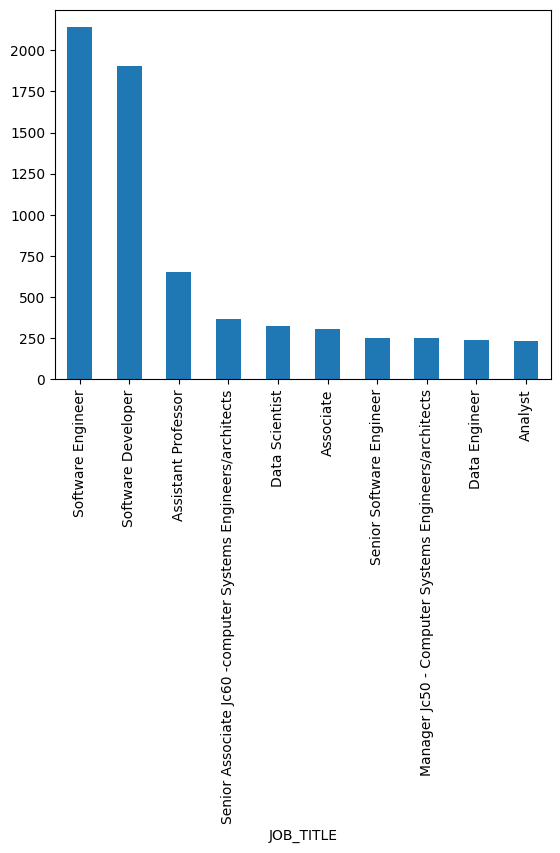

In [56]:
certified_h1b['JOB_TITLE'].value_counts()[0:10].plot(kind='bar');

In [57]:
# Let's convert all of the entries in the JOB_TITLE column to title case
certified_h1b['JOB_TITLE'] = [x.title() for x in certified_h1b['JOB_TITLE']]

/var/folders/zy/1n1cqtl540n_747vnk5pgbrm0000gn/T/ipykernel_10566/3278227998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  certified_h1b['JOB_TITLE'] = [x.title() for x in certified_h1b['JOB_TITLE']]


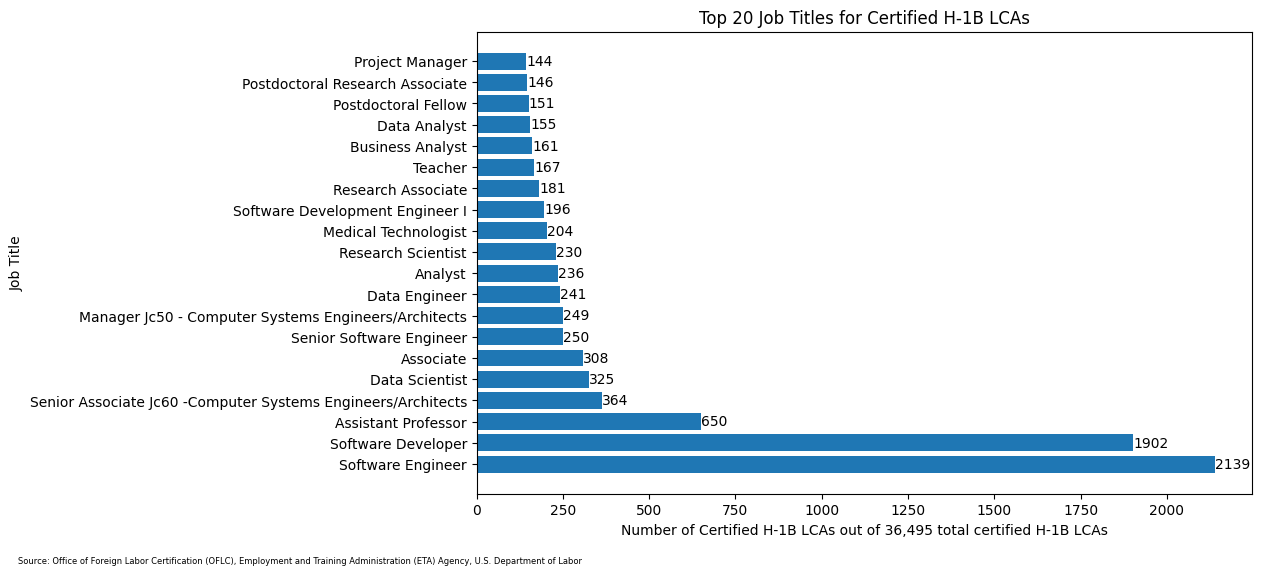

In [58]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(certified_h1b['JOB_TITLE'].value_counts()[0:20].index, certified_h1b['JOB_TITLE'].value_counts()[0:20].values);
ax.bar_label(ax.containers[0]);
ax.title.set_text('Top 20 Job Titles for Certified H-1B LCAs');
ax.set_ylabel('Job Title');
ax.set_xlabel(f'Number of Certified H-1B LCAs out of {certified_h1b.shape[0]:,} total certified H-1B LCAs');
ax.annotate(text='Source: Office of Foreign Labor Certification (OFLC), Employment and Training Administration (ETA) Agency, U.S. Department of Labor', xy=(0,0), xytext=(-330,-50), fontsize=6, 
             xycoords='axes fraction', textcoords='offset points');


This doesn't even consider job titles such as "Principal Software Engineer" or "Lead Software Engineer".

Looking at the graph above, most of these roles fall into established STEM categories. Perhaps the roles that we can think about outside of STEM are the "Teacher" roles, "Postdoctoral Fellow" roles, and "Assistant Professor" roles. This begs the question, who is contributing the most to the LCAs that are filed for these roles? What fields or industries are they in?

Academia seems to be the most prevalent pathway for non-STEM people to stay in the U.S.

In [59]:
# I want to narrow down positions based on their relevance to STEM or non-STEM
# I will use the SOC codes for the job titles
# Let's see what those look like

certified_h1b['SOC_CODE'].unique()

array(['19-1042.00', '13-1111.00', '15-1252.00', '15-1251.00',
       '15-1299.00', '15-1299.08', '29-1216.00', '27-2022.00',
       '15-1244.00', '17-2051.00', '29-2011.00', '19-3051.00',
       '29-9099.00', '11-3121.00', '25-1052.00', '17-2141.00',
       '15-1253.00', '29-1031.00', '11-2021.00', '13-1199.00',
       '15-1211.00', '17-2112.00', '13-2054.00', '15-2051.01',
       '13-1041.07', '19-1029.02', '15-1299.05', '11-1021.00',
       '19-1032.00', '15-1243.01', '15-1242.00', '11-3021.00',
       '15-1243.00', '19-1029.01', '15-1299.09', '13-1082.00',
       '27-1021.00', '17-3011.00', '25-2031.00', '15-1254.00',
       '19-1022.00', '17-2061.00', '11-9041.00', '25-1126.00',
       '13-2011.00', '17-2112.02', '13-2099.04', '27-1011.00',
       '15-2051.00', '29-1141.00', '25-1021.00', '17-2072.00',
       '17-2112.03', '11-3031.00', '15-1212.00', '25-1011.00',
       '19-2031.00', '19-2012.00', '15-2041.00', '11-9033.00',
       '15-1255.00', '13-1081.00', '29-1051.00', '15-20

In [60]:
certified_h1b['SOC_CODE'].unique().size

529

In [61]:
certified_h1b['SOC_CODE'].nunique()

529

In [62]:
certified_h1b['SOC_TITLE'].nunique()

476

In [63]:
certified_h1b['SOC_TITLE'].unique()

array(['Medical Scientists, Except Epidemiologists',
       'Management Analysts', 'Software Developers',
       'Computer Programmers', 'Computer Occupations, All Other',
       'Computer Systems Engineers/Architects',
       'General Internal Medicine Physicians', 'Coaches and Scouts',
       'Network and Computer Systems Administrators', 'Civil Engineers',
       'Medical and Clinical Laboratory Technologists',
       'Urban and Regional Planners',
       'Healthcare Practitioners and Technical Workers, All Other',
       'Human Resources Managers', 'Chemistry Teachers, Postsecondary',
       'Mechanical Engineers',
       'Software Quality Assurance Analysts and Testers',
       'Dietitians and Nutritionists', 'Marketing Managers',
       'Business Operations Specialists, All Other',
       'Computer Systems Analysts', 'Industrial Engineers',
       'Financial Risk Specialists', 'Business Intelligence Analysts',
       'Regulatory Affairs Specialists',
       'Molecular and Cellula

In [64]:
certified_h1b[certified_h1b['SOC_TITLE'] == 'Software Engineer'].value_counts()

Series([], Name: count, dtype: int64)

In [65]:
certified_h1b[certified_h1b['SOC_TITLE'].str.contains('software', case=False)]['SOC_TITLE'].value_counts()

SOC_TITLE
Software Developers                                         8813
Software Quality Assurance Analysts and Testers             1014
SOFTWARE DEVELOPERS                                           37
Software Quality Assurance Engineers and Testers              30
Software Developers, Non R&D                                  17
Software Developers, R&D                                      15
SOFTWARE QUALITY ASSURANCE ANALYSTS AND TESTERS                1
Software Developer                                             1
Software Quality Assurance Analysts and Testers, Non R&D       1
Name: count, dtype: int64

In [66]:
certified_h1b[certified_h1b['SOC_TITLE'].str.contains('software', case=False)]['SOC_TITLE'].size

9929

We have uncovered that the H-1B certified roles for new employment that contain the word "software" in them total to $9,975$ out of the total $37,108$ roles that were awarded certified status for an H-1B Labor Condition Application.

In [67]:
# let's see how many full time positions that were applied for
data['FULL_TIME_POSITION'].value_counts()

FULL_TIME_POSITION
Y    125609
N      2330
Name: count, dtype: int64

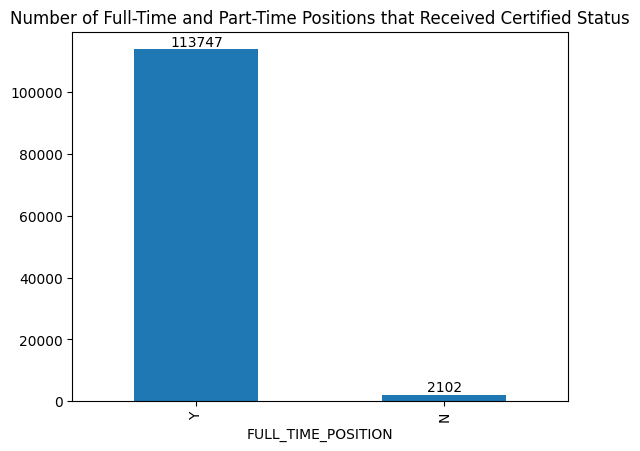

In [68]:
# let's see how many full-time and part-time positions received certified status
ax = data[data['CASE_STATUS'] == 'Certified']['FULL_TIME_POSITION'].value_counts().plot(kind='bar')
plt.title('Number of Full-Time and Part-Time Positions that Received Certified Status')
ax.bar_label(ax.containers[0]);

In [69]:
# for the roles that were given certified status and are part-time, let's find out what the job titles are
data[(data['CASE_STATUS'] == 'Certified') & (data['FULL_TIME_POSITION'] == 'N')]['JOB_TITLE'].value_counts()

JOB_TITLE
Software Developer                             101
Software Engineer                               51
Accountant                                      38
Business Analyst                                37
Assistant Professor                             30
                                              ... 
Test Engineer - Brake And Vehicle Stability      1
Commercial Line Underwriting Associate           1
Commercial Designer                              1
Hr & Finance Administrator                       1
Ob/gyn Laborist                                  1
Name: count, Length: 1005, dtype: int64